### ✅ **LDA (Linear Discriminant Analysis)**

- **Supervised** technique — requires class labels  
- Goal: **Maximize separation between classes**, minimize variation within classes  
- Finds **linear discriminants** (LD1, LD2, …) — projection axes that best separate groups  
- Output dimensions ≤ (number of classes – 1)  
- Best for **classification prep** — not just compression  
- Assumes:  
  - Data per class is normally distributed  
  - Classes have similar covariance matrices  
- Works best with **linearly separable** classes  
- Not for unsupervised tasks (use PCA if no labels)  
- Common use:  
  - Face recognition (with labeled identities)  
  - Spam detection  
  - Medical diagnosis (disease vs healthy)  
  - Fraud detection  
- Often used *before* classifiers like SVM, Logistic Regression  
- Better than PCA **when class separation matters**  
- Can be extended to Quadratic Discriminant Analysis (QDA) for non-linear boundaries  

---

📌 **Remember:**  
**PCA = “Find the most variance”**  
**LDA = “Find the most separation”**


In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
from sklearn.metrics import *
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [202]:
# Data loading

In [203]:
digits = load_digits()

In [204]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [287]:
# print(digits.DESCR)

In [206]:
# creating a dataframe

In [207]:
df = pd.DataFrame(digits.data, columns = digits.feature_names)

In [208]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [291]:
# print(df.to_string())
# to view the full df

In [210]:
df['Target'] = digits.target

In [211]:
df['Target'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [212]:
df['Target'].value_counts()

Target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

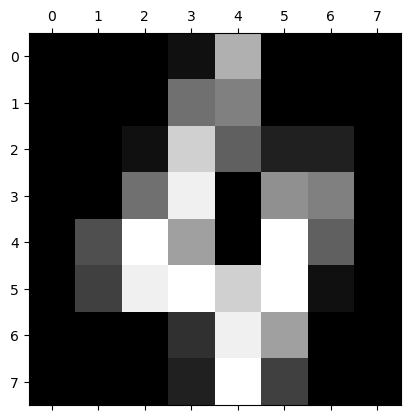

In [213]:
plt.gray()
plt.matshow(digits.data[4].reshape(8,8))
plt.show()

In [214]:
# splitting the features

In [215]:
X = digits.data
y = digits.target

In [216]:
X_DF = df.drop('Target', axis = 1)
y_DF = df['Target']

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 20)

In [218]:
# Scaling

In [219]:
scaler = StandardScaler()

In [220]:
X_train = scaler.fit_transform(X_train)

In [221]:
X_test = scaler.transform(X_test)

In [222]:
# LinearDiscriminantAnalysis

**Linear Discriminant Analysis (LDA)**

To find the number of components for LDA:  
Use formula → **n - 1**, where n = number of classes.

Example: 3 classes → max 2 discriminant components.

If features < classes: use `min(features, classes - 1)`.

In [224]:
min(64, 9)

9

In [225]:
# the above is the n value

In [226]:
LDA = LinearDiscriminantAnalysis()

In [227]:
X_train = LDA.fit_transform(X_train, y_train)

In [228]:
X_test = LDA.transform(X_test)

In [229]:
# lda coefficients

In [230]:
X_train.shape

(1347, 9)

In [231]:
sum(LDA.explained_variance_ratio_)

1.0

In [232]:
# ModelBuilding

In [233]:
X_train.shape, X_test.shape

((1347, 9), (450, 9))

In [234]:
model = RandomForestClassifier()

In [235]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [236]:
pred = model.predict(X_test)

In [237]:
accuracy_score(y_test, pred)

0.9488888888888889

In [238]:
print(confusion_matrix(y_test, pred))

[[44  0  0  0  1  0  0  0  0  0]
 [ 0 44  0  1  0  0  0  0  0  1]
 [ 0  1 43  0  0  0  0  0  0  0]
 [ 0  0  1 42  0  0  0  0  2  1]
 [ 0  1  0  0 42  0  0  1  0  1]
 [ 0  0  0  1  0 41  1  0  1  2]
 [ 0  0  0  0  0  1 43  0  0  1]
 [ 0  0  0  0  0  0  0 45  0  0]
 [ 0  3  0  0  0  0  0  0 40  0]
 [ 0  1  0  0  0  0  0  0  1 43]]


In [239]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.88      0.96      0.92        46
           2       0.98      0.98      0.98        44
           3       0.95      0.91      0.93        46
           4       0.98      0.93      0.95        45
           5       0.98      0.89      0.93        46
           6       0.98      0.96      0.97        45
           7       0.98      1.00      0.99        45
           8       0.91      0.93      0.92        43
           9       0.88      0.96      0.91        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450

